In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target
print(y)
# pd.DataFrames
print('Class labels:', np.unique(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print(y_test)

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [4]:
from sklearn.preprocessing import StandardScaler

# help(StandardScaler.fit)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_test_std)

[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43838721]
 

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

/var/folders/yw/rhny6n8d2252w05hgg3j0rcw0000gn/T/ipykernel_16751/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


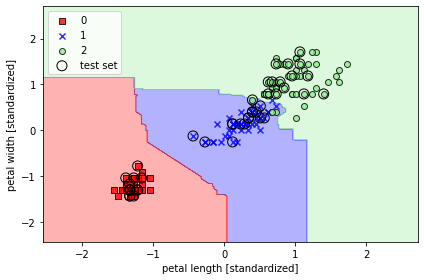

In [13]:
from sklearn.neighbors import KNeighborsClassifier

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=1, #1 マンハッタン　2 ユークリッド
                           metric='minkowski')  #minkowskiはpを一般化したもの
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

[knn公式ドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.htmlz)